# CH07

## 07-3 신경망 모델 훈련
`드롭아웃` `콜백` `조기종료`

## 손실 곡선

In [10]:
# MNIST 데이터셋 적재 후 훈련 세트와 검증 세트로 나누기
from tensorflow import keras
from sklearn.model_selection import train_test_split

(train_input, train_target), (test_input, test_target) = \
    keras.datasets.fashion_mnist.load_data()

train_scaled = train_input / 255.0

train_scaled, val_scaled, train_target, val_target = train_test_split(
    train_scaled, train_target, test_size=0.2, random_state=42)

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [11]:
# 모델을 만드는 함수를 정의
def model_fn(a_layer=None):
    model = keras.Sequential()
    model.add(keras.layers.Flatten(input_shape=(28, 28)))
    model.add(keras.layers.Dense(100, activation='relu'))
    # if 구문: model_fn() 함수에 케라스 층을 추가하면 은닉층 뒤에 또 하나의 층을 추가
    if a_layer:
        model.add(a_layer)
    model.add(keras.layers.Dense(10, activation='softmax'))
    return model

In [12]:
# 모델 구조 출력
model = model_fn()

model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 100)                 │          78,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 79,510 (310.59 KB)

 Trainable params: 79,510 (310.59 KB)

 Non-trainable params: 0 (0.00 B)

In [13]:
model.compile(loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# fit() 메서드 결과 history 변수에 담기
# verbose: 훈련 과정 출력 조절,verbose=0이면 훈련 과정 출력 안함
history = model.fit(train_scaled, train_target, epochs=5, verbose=0)

In [14]:
# history 딕셔너리 값 확인
print(history.history.keys())

dict_keys(['accuracy', 'loss'])


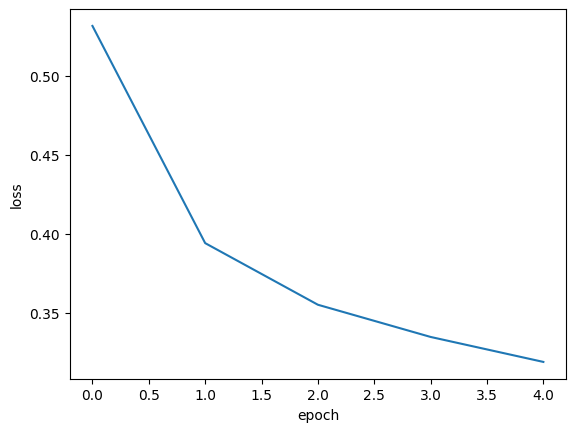

In [15]:
# 손실 그래프
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

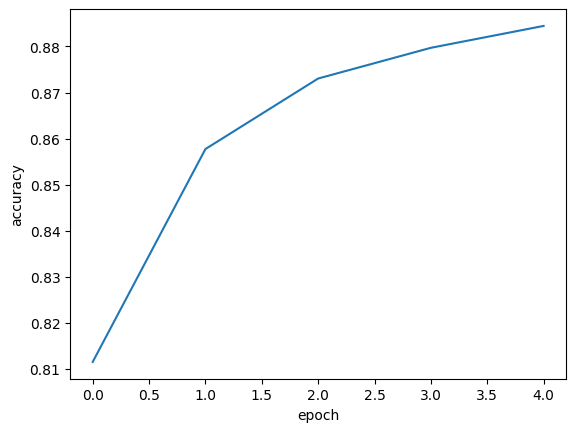

In [16]:
# 정확도 그래프
plt.plot(history.history['accuracy'])
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

In [17]:
# 에포크 횟수 20으로 늘려서 모델 훈련
model = model_fn()
model.compile(loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model.fit(train_scaled, train_target, epochs=20, verbose=0)

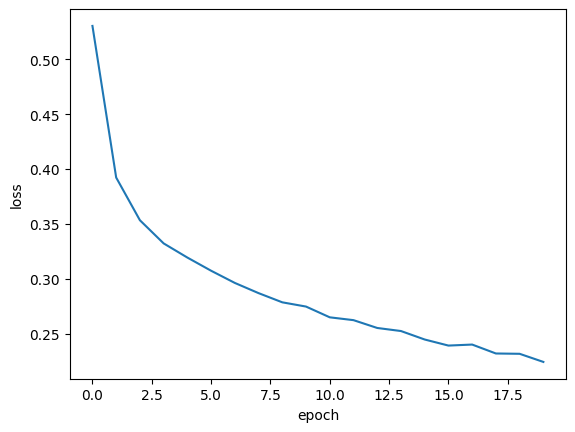

In [18]:
# 손실 그래프
plt.plot(history.history['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

예상 대로 손실이 잘 감소하지만 놓친 부분이 없는지 다시 생각해보자!

## 검증 손실

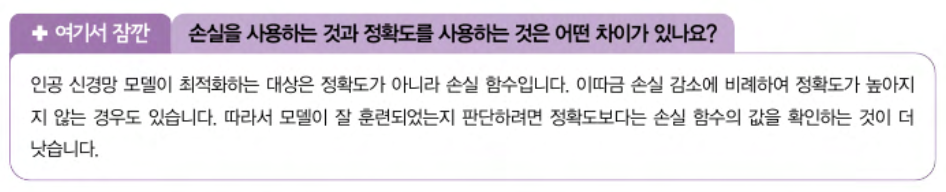

In [19]:
from IPython.display import Image, display
display(Image('/content/drive/MyDrive/DArtB_5th/MLDL/img7.png'))

In [20]:
# validation_data 매개변수에 검증에 사용할 입력과 타깃값을 튜플로 만들어 전달
model = model_fn()
model.compile(loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model.fit(train_scaled, train_target, epochs=20, verbose=0,
                    validation_data=(val_scaled, val_target))

In [21]:
# history.history 딕셔너리 keys 확인
print(history.history.keys())

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


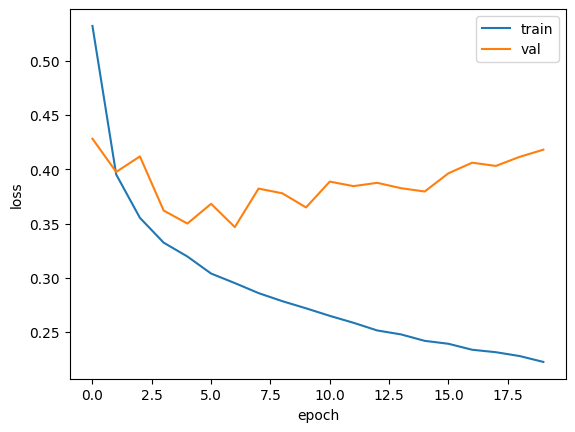

In [22]:
# 손실과 검증 손실을 한 그래프에 그려서 비교
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

검증 손실이 상승하는 시점을 가능한 뒤로 늦추면 검증 세트에 대한 손실이 줄어들 뿐만 아니라 검증 세트에 대한 정확도도 증가할 것!

In [23]:
# Adam 옵티마이저 적용
model = model_fn()
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(train_scaled, train_target, epochs=20, verbose=0,
                    validation_data=(val_scaled, val_target))

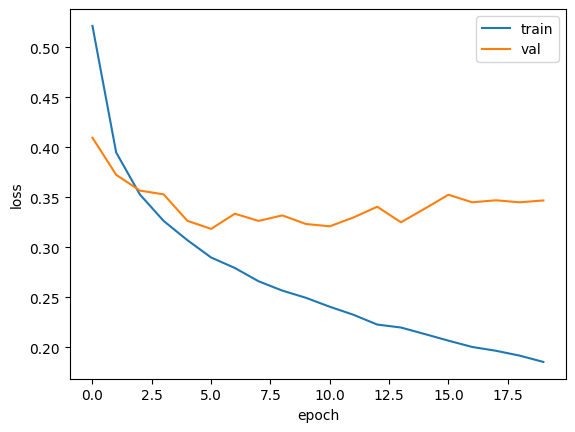

In [24]:
# 훈련 손실과 검증 손실 비교
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

과대 적합이 감소했다!   
학습률을 조정해서 다시 시도해볼 수도 있음

---

### 학습률을 조정하는 방법
by chatGPT   
   
`Adam` 옵티마이저에서 **학습률(learning rate)**을 줄이려면 `optimizer='adam'` 대신 **직접 옵티마이저 객체를 생성**해서 `learning_rate`를 설정해주면 돼요.

예를 들어, 학습률을 기본값(0.001)보다 낮은 **0.0001**로 설정하고 싶다면 이렇게 하면 됩니다:

```python
from tensorflow.keras.optimizers import Adam

model = model_fn()
optimizer = Adam(learning_rate=0.0001)  # 학습률을 낮춤

model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(train_scaled, train_target, epochs=20, verbose=0,
                    validation_data=(val_scaled, val_target))
```

---

✅ 요약  
- `optimizer='adam'` → `Adam(learning_rate=값)` 으로 바꾸기  
- 기본값: `0.001`  
- 낮출수록 **느리지만 안정적인 학습** 가능

학습률을 너무 낮추면 수렴이 너무 느려질 수 있어서, 0.0001 또는 0.0005 정도부터 시도해보는 게 좋아요!  
필요하면 `ReduceLROnPlateau` 같은 콜백도 쓸 수 있어요.

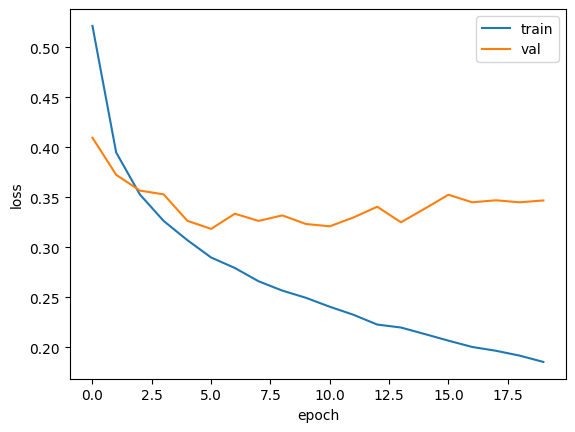

In [25]:
# 훈련 손실과 검증 손실 비교
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

## 드롭아웃   
훈련 과정에서 층에 있는 일부 뉴련을 랜덤하게 꺼서 과대 적합을 막음

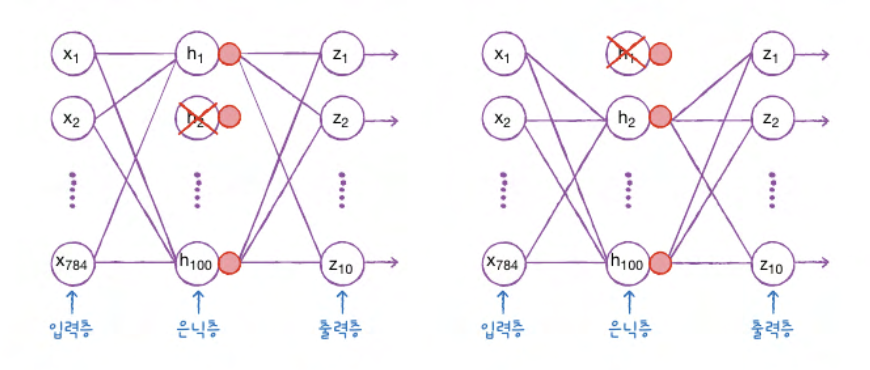

In [26]:
display(Image('/content/drive/MyDrive/DArtB_5th/MLDL/img8.png'))

In [27]:
# model_fn() 함수에 드롭 아웃 객체 전달하여 층 추가
model = model_fn(keras.layers.Dropout(0.3))

model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_4 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 100)                 │          78,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 100)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 10)                  │           1,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 79,510 (310.59 KB)

 Trainable params: 79,510 (310.59 KB)

 Non-trainable params: 0 (0.00 B)

In [28]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(train_scaled, train_target, epochs=20, verbose=0,
                    validation_data=(val_scaled, val_target))

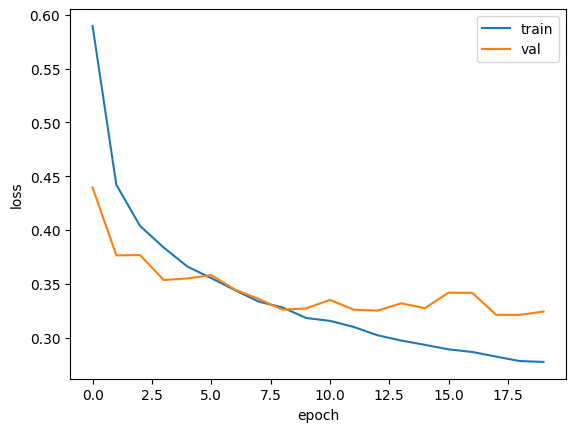

In [29]:
# 훈련 손실, 검증 손실 그래프 비교
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

## 모델 저장과 복원

In [30]:
# 에포크 횟수를 10 으로 다시 지정하고 모델을 훈련
model = model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(train_scaled, train_target, epochs=10, verbose=0,
                    validation_data=(val_scaled, val_target))

In [31]:
# 모델 구조와 파라미터 함께 저장
model.save('model-whole.keras')

In [32]:
# 훈련된 모델의 파라미터 저장
model.save_weights('model.weights.h5')

In [33]:
# 파일이 잘 생성됐는지 확인
!ls -al model*

-rw-r--r-- 1 root root 976600 Apr  3 03:15 model.weights.h5
-rw-r--r-- 1 root root 979390 Apr  3 03:15 model-whole.keras


In [34]:
# 첫 번째 실험: 훈련하지 않은 새로운 모델, model-weights.h5 파일에서 훈련된 모델 파라미터를 읽어서 사용
model = model_fn(keras.layers.Dropout(0.3))

model.load_weights('model.weights.h5')

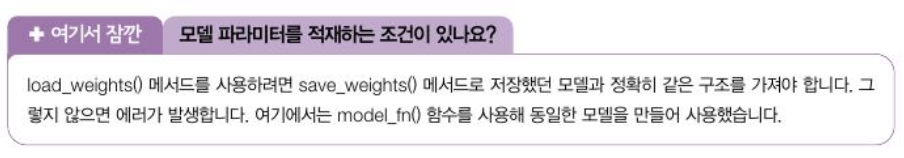

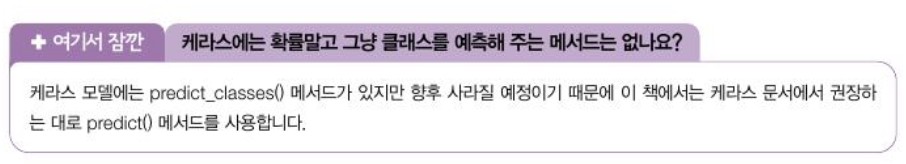

In [35]:
display(Image('/content/drive/MyDrive/DArtB_5th/MLDL/img9.png'))
display(Image('/content/drive/MyDrive/DArtB_5th/MLDL/img10.png'))

In [36]:
# 10개 확률 중에 가장 큰 값의 인덱스를 골라 타깃 레이블과 비교하여 정확도 계산
import numpy as np

val_labels = np.argmax(model.predict(val_scaled), axis=-1)
print(np.mean(val_labels == val_target))

375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
0.8814166666666666


In [37]:
# 모델 전체를 파일에서 읽은 다음 검증 세트의 정확도를 출력
model = keras.models.load_model('model-whole.keras')

model.evaluate(val_scaled, val_target)

375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8846 - loss: 0.3318


[0.33123937249183655, 0.8814166784286499]

## 콜백   
콜백
- 훈련 과정 중간에 어떤 작업을 수행할 수 있게 하는 객체, keras.callbacks 패키지 아래에 있는 클래스들
- fit() 메서드의 callbacks 매개변수에 리스트로 전달하여 사용

In [38]:
# 콜백 적용
model = model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

checkpoint_cb = keras.callbacks.ModelCheckpoint('best-model.keras',
                                                save_best_only=True)

model.fit(train_scaled, train_target, epochs=20, verbose=0,
          validation_data=(val_scaled, val_target),
          callbacks=[checkpoint_cb])

In [39]:
# 예측 수행
model = keras.models.load_model('best-model.keras')

model.evaluate(val_scaled, val_target)

375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8908 - loss: 0.3134


[0.31349942088127136, 0.887583315372467]

**조기 종료**: 과대 적합이 시작 되기 전 미리 중지, 훈련 에포크 횟수를 제한하는 역할

In [40]:
# Earlystopping 콜백을 ModelCheckpoint 콜백과 함께 사용
model = model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

checkpoint_cb = keras.callbacks.ModelCheckpoint('best-model.keras',
                                                save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=2,
                                                  restore_best_weights=True)

history = model.fit(train_scaled, train_target, epochs=20, verbose=0,
                    validation_data=(val_scaled, val_target),
                    callbacks=[checkpoint_cb, early_stopping_cb])

In [41]:
print(early_stopping_cb.stopped_epoch)

8


이 경우 최상의 모델은 14번째 에포크

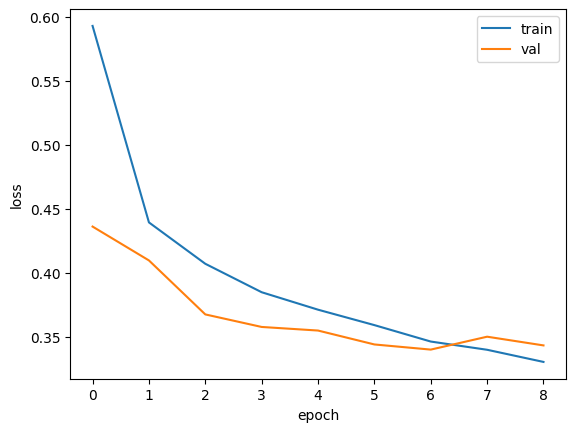

In [42]:
# 훈련 손실과 검증 손실 출력
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

In [43]:
# 조기 종료로 얻은 모델을 사용해 검증 세트 성능 확인
model.evaluate(val_scaled, val_target)

375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8772 - loss: 0.3394


[0.33992457389831543, 0.8754166960716248]